In [1]:
import pandas as pd

from collections import Counter
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import nltk
from nltk import ngrams

In [3]:
df = pd.read_csv('preprocessed_data.csv')

In [4]:
df['transcript']

0      ['chico', 'estar', 'bienvenido', 'directo', 'd...
1      ['bienvenido', 'chico', 'directo', 'mercado', ...
2      ['viernes', 'gente', 'fallecer', 'pelota', 'úl...
3      ['dj', 'mario', 'gente', 'boludo', 'cancha', '...
4                      ['wow', 'music', 'music', 'dude']
                             ...                        
387    ['música', 'estar', 'limpiar', 'bota', 'música...
388    ['música', 'entender', 'gustar', 'gustar', 'su...
389    ['domingo', 'coche', 'choque', 'episodio', 'ca...
390    ['chico', 'poquito', 'verde', 'azul', 'guapa',...
391    ['chico', 'estar', 'convertir', 'mario', 'subi...
Name: transcript, Length: 392, dtype: object

In [5]:
occurrences_per_transcript = df['transcript'].str.count(r'xxxx')

# Calculate total occurrences
total_insults = occurrences_per_transcript.sum()

# Calculate average occurrence per transcript
average_occurrence = total_insults / len(df)

print(f"Average occurrences of 'insultar' per transcript: {average_occurrence:.2f}")
print(f"Total occurrences of 'insultar' per transcript: {total_insults:.2f}")

Average occurrences of 'insultar' per transcript: 38.32
Total occurrences of 'insultar' per transcript: 15022.00


In [6]:
import ast

processed_transcripts = df['transcript'].apply(ast.literal_eval)


In [7]:
type(processed_transcripts)

pandas.core.series.Series

In [8]:
# 1. Identify commonly used phrases using N-grams
all_ngrams = [ngram for transcript in processed_transcripts for ngram in ngrams(transcript, 3)]  # trigrams
common_phrases = Counter(all_ngrams).most_common(20)
print("Common Phrases:")
for phrase, freq in common_phrases:
    print(f"{' '.join(phrase)}: {freq}")

Common Phrases:
uy uy uy: 1441
cara sudar cara: 1007
sudar cara sudar: 976
ay ay ay: 794
música música música: 530
mira mira mira: 471
valer valer valer: 376
aplauso aplauso aplauso: 342
aplauso música aplauso: 238
gol gol gol: 225
cuidado cuidado cuidado: 223
parís saint germain: 217
chico chico chico: 215
música aplauso música: 202
cara payaso cara: 185
cara llorar risa: 184
payaso cara payaso: 184
risa cara llorar: 152
sonriente cara sonriente: 151
xxxx xxxx xxxx: 148


In [9]:
# 2. Identify topics using LDA
dictionary = Dictionary(processed_transcripts)
corpus = [dictionary.doc2bow(transcript) for transcript in processed_transcripts]
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=5, passes=15, workers=4)
print("\nTopics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}, Words: {topic}")


Topics:
Topic: 0, Words: 0.013*"aplauso" + 0.009*"chico" + 0.007*"jugar" + 0.007*"partido" + 0.007*"ver" + 0.006*"música" + 0.005*"pasar" + 0.005*"madrid" + 0.005*"valer" + 0.004*"poner"
Topic: 1, Words: 0.016*"partido" + 0.010*"jugar" + 0.009*"gol" + 0.009*"balón" + 0.009*"ver" + 0.008*"chico" + 0.008*"equipo" + 0.008*"ganar" + 0.007*"madrid" + 0.007*"música"
Topic: 2, Words: 0.011*"jugador" + 0.011*"ver" + 0.010*"decir" + 0.010*"equipo" + 0.008*"jugar" + 0.007*"valer" + 0.007*"venir" + 0.007*"querer" + 0.006*"eh" + 0.006*"xxxx"
Topic: 3, Words: 0.018*"chico" + 0.014*"tío" + 0.014*"xxxx" + 0.014*"aplauso" + 0.012*"música" + 0.011*"salir" + 0.009*"valer" + 0.008*"ver" + 0.008*"poner" + 0.007*"partido"
Topic: 4, Words: 0.010*"música" + 0.010*"xxxx" + 0.009*"chico" + 0.009*"ver" + 0.007*"valer" + 0.007*"decir" + 0.006*"pasar" + 0.006*"salir" + 0.006*"venir" + 0.006*"madrid"


In [10]:
# 3. Identify unique terms/values using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.85)
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(transcript) for transcript in processed_transcripts])
feature_names = tfidf_vectorizer.get_feature_names_out()
sorted_items = sorted(list(enumerate(tfidf_matrix.sum(axis=0).tolist()[0])), key=lambda x: x[1], reverse=True)
print("\nUnique Terms:")
for idx, score in sorted_items[:10]:
    print(f"{feature_names[idx]}: {score}")



Unique Terms:
aplauso: 35.193068630356606
xxxx: 34.95071398165938
tío: 25.882557814203096
gol: 24.109064414052934
eh: 18.81053914916156
madrid: 18.19795509585576
directo: 16.988244961850068
gente: 16.8232268853536
año: 16.62127612244177
mario: 16.284309636157957


In [11]:
all_tokens = [token for transcript in processed_transcripts for token in transcript]

# Count the occurrences of each token
word_freq = Counter(all_tokens)

# Display the 10 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('chico', 19628), ('xxxx', 15021), ('música', 14989), ('tío', 13718), ('aplauso', 13642), ('ver', 13606), ('partido', 12650), ('salir', 12613), ('valer', 11419), ('jugar', 10991), ('poner', 10138), ('decir', 9294), ('venir', 9278), ('pasar', 8337), ('equipo', 7646)]
       Word  Frequency
0     chico      19628
1      xxxx      15021
2    música      14989
3       tío      13718
4   aplauso      13642
5       ver      13606
6   partido      12650
7     salir      12613
8     valer      11419
9     jugar      10991
10    poner      10138
11    decir       9294
12    venir       9278
13    pasar       8337
14   equipo       7646


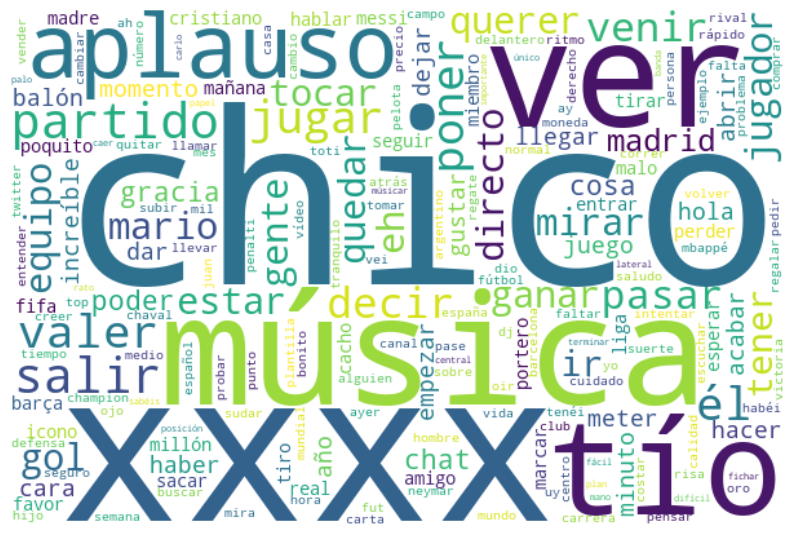

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert the list of tokens back into a single string for each transcript
all_text = ' '.join([' '.join(transcript) for transcript in processed_transcripts])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(all_text)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("transcript_wordcloud.png")

plt.show()